In [1]:
import pandas as pd
import numpy as np
import math
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Pie, Line, Page
from pyecharts.faker import Faker
import matplotlib.pyplot as plt
from shapely.geometry import *
from shapely import affinity
import geopandas as gpd

%matplotlib inline

In [2]:
xs = [0.00,
      151.17,
      371.11,
      0.00,
      151.17,
      371.11,
      0.00,
      151.17,
      371.11,
      0.00,
      151.17,
      371.11,
      0.00,
      151.17,
      251.26,
      0.00,
      151.17]

ys = [295.19,
      295.19,
      295.19,
      224.14,
      224.14,
      224.14,
      170.97,
      170.97,
      170.97,
      107.43,
      107.43,
      107.43,
      48.89,
      48.89,
      48.89,
      0.00,
      0.00]

points = [Point(i, j) for i, j in zip(xs, ys)]

In [3]:
i1s = [2,
       1,
       3,
       4,
       6,
       7,
       8,
       7,
       9,
       10,
       11,
       10,
       12,
       13,
       15,
       0,
       3,
       1,
       4,
       7,
       10,
       13,
       16,
       13,
       10,
       7,
       4,
       15,
       2,
       5,
       8,
       16,
       14]

i2s = [1,
       0,
       4,
       5,
       7,
       8,
       7,
       6,
       10,
       11,
       10,
       9,
       13,
       14,
       16,
       3,
       6,
       4,
       7,
       10,
       13,
       16,
       13,
       10,
       7,
       4,
       1,
       12,
       5,
       8,
       11,
       14,
       11]

widths = [5,
          5,
          10,
          10,
          17,
          17,
          17,
          17,
          23,
          23,
          23,
          23,
          8,
          8,
          14,
          15,
          15,
          17,
          17,
          17,
          17,
          17,
          17,
          17,
          17,
          17,
          17,
          8,
          15,
          15,
          15,
          14,
          14]

lines = [LineString([points[i], points[j]]) for i, j in zip(i1s, i2s)]

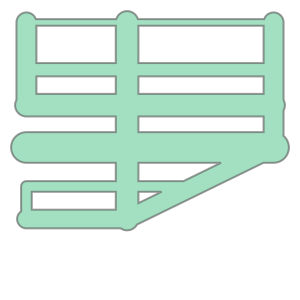

In [4]:
widlines = [lines[i].buffer(widths[i], cap_style = 1) for i in range(0, 33)]
unionline = []
for i in range(0, 33):
    if i == 0:
        unionline.append(widlines[0])
    else:
        unionline.append(unionline[i - 1].union(widlines[i]))
        
multiStreetsArea = unionline[32]
multiStreetsArea

In [5]:
lampx = [-16.8772,
         -16.5836,
         -16.3686,
         -15.3867,
         -15.3257,
         -14.2427,
         -14.1336,
         -11.6451,
         -9.22561,
         -6.27502,
         1.0461,
         1.63815,
         3.65334,
         8.58062,
         9.75026,
         11.0483,
         17.3859,
         26.4927,
         38.1314,
         41.427,
         43.1855,
         48.0341,
         49.8215,
         55.0648,
         78.9696,
         84.9173,
         86.0436,
         89.2782,
         92.3732,
         95.542,
         115.365,
         118.694,
         122.837,
         128.194,
         128.497,
         130.134,
         130.777,
         136.857,
         137.896,
         138.734,
         140.853,
         141.404,
         146.702,
         147.635,
         147.667,
         156.851,
         157.573,
         158.712,
         158.745,
         158.977,
         164.992,
         165.092,
         165.918,
         166.191,
         168.756,
         170.826,
         176.05,
         178.457,
         184.007,
         184.591,
         201.017,
         202.883,
         207.411,
         212.927,
         217.423,
         217.846,
         221.966,
         236.172,
         239.962,
         240.017,
         252.798,
         254.081,
         264.77,
         273.402,
         277.036,
         279.613,
         300.676,
         306.539,
         312.624,
         313.536,
         315.134,
         315.506,
         333.604,
         345.917,
         348.523,
         348.806,
         355.128,
         355.641,
         358.18,
         359.065,
         365.844,
         373.016,
         374.797,
         375.232,
         375.278,
         384.234,
         387.925,
         388.693,
         389.179]

lampy = [254.861,
         194.027,
         219.959,
         157.467,
         144.834,
         131.877,
         38.7943,
         87.0161,
         8.57735,
         102.014, 
         276.598,
         224.409,
         18.3104,
         125.059,
         235.106,
         177.603,
         -7.85399,
         8.16844,
         -7.04044,
         226.357,
         284.879,
         126.007,
         178.545,
         8.3732,
         59.408,
         236.642,
         285.186,
         178.828,
         101.392,
         8.66328,
         59.6688,
         286.085,
         -8.42805,
         9.22972,
         228.311,
         171.142,
         178.793,
         258.29,
         113.353,
         221.735,
         64.5057,
         20.9598,
         262.35,
         280.308,
         -8.2501,
         203.248,
         265.087,
         99.5399,
         163.369,
         44.6891,
         278.438,
         187.35,
         16.1489,
         171.068,
         -8.09897,
         126.887,
         101.659,
         237.312,
         3.64576,
         23.5964,
         3.10278,
         180.307,
         228.876,
         284.101,
         127.886,
         40.1243,
         102.653,
         48.8991,
         179.908,
         239.083,
         128.139,
         285.061,
         43.785,
         228.684,
         180.506,
         69.4894,
         286.392,
         128.857,
         66.0691,
         229.637,
         180.447,
         103.323,
         88.8254,
         286.384,
         239.861,
         181.021,
         69.3656,
         103.943,
         141.86,
         240.269,
         104.349,
         168.894,
         222.762,
         273.629,
         193.511,
         240.781,
         180.968,
         92.2122,
         132.441]

lamps = [Point(i, j) for i, j in zip(lampx, lampy)]

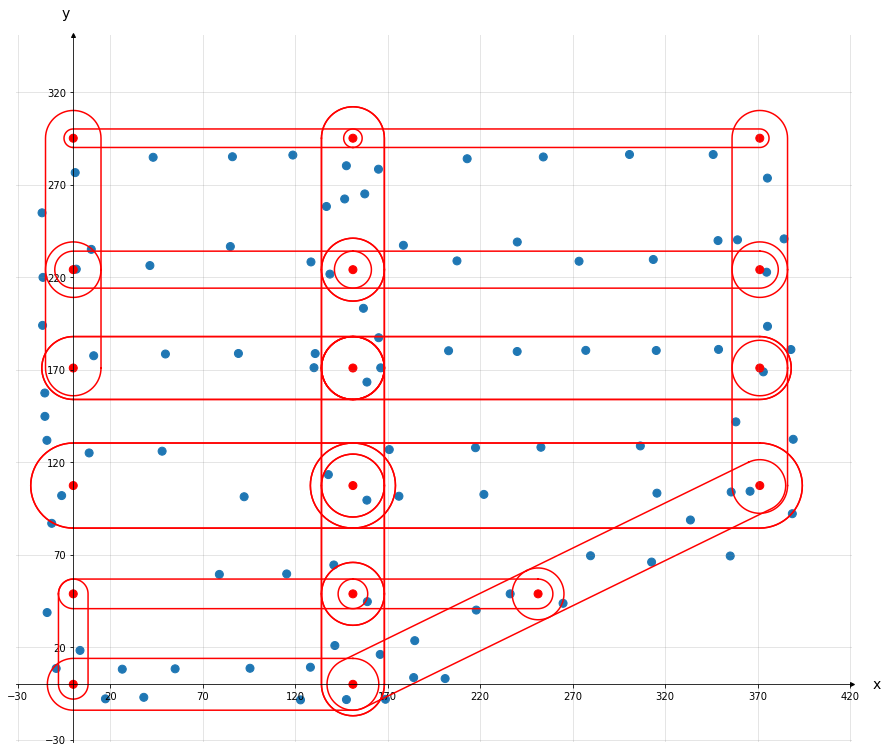

In [6]:
ss = [64 for i in lampx]

scs = [64 for i in xs]
ccs = ["red" for i in xs]

xmin, xmax, ymin, ymax = -30, 420, -30, 350

ticks_frequency = 50

fig, ax = plt.subplots(figsize=(15, 13))

ax.scatter(lampx, lampy, s = ss)

ax.scatter(xs, ys, s = scs, c = ccs)

for i in range(0, 33):
    x, y = widlines[i].exterior.xy
    ax.plot(x, y, c="red")

ax.set(xlim = (xmin - 1, xmax + 1), ylim = (ymin - 1, ymax + 1), aspect = 'equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size = 14, labelpad = -24, x = 1.03)
ax.set_ylabel('y', size = 14, labelpad = -21, y = 1.02, rotation = 0)

x_ticks = np.arange(xmin, xmax + 1, ticks_frequency)
y_ticks = np.arange(ymin, ymax + 1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.grid(which = 'both', color = 'grey', linewidth = 1, linestyle = '-', alpha = 0.2)

arrow_fmt = dict(markersize = 4, color='black', clip_on = False)
ax.plot((1), (0), marker = '>', transform = ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker = '^', transform = ax.get_xaxis_transform(), **arrow_fmt)

plt.show()

In [7]:
xLidar = [38.1314,
          48.0341,
          -16.3686,
          140.853,
          178.457,
          240.017,
          313.536,
          306.539,
          254.081,
          264.77]

yLidar = [-7.04044,
          126.007,
          219.959,
          64.5057,
          237.312,
          239.083,
          229.637,
          128.857,
          285.061,
          43.785]

dirLidar = [0,
            135,
            270,
            270,
            90,
            180,
            315,
            225,
            135,
            26]

lidarNum = 10

xWifi = [41.427,
         92.3732,
         95.542,
         156.851,
         264.77,
         300.676,
         358.18]

yWifi = [226.357,
         101.392,
         8.66328,
         203.248,
         43.785,
         286.392,
         141.86]

wifiNum = 7

bothNum = 1

In [8]:
dirdict = {'N': 0,
           'NW': 45,
           'W': 90,
           'SW': 135,
           'S': 180,
           'SE': 225,
           'E': 270,
           'NE': 315}

In [9]:
lidars = [Point(i, j) for i, j in zip(xLidar, yLidar)]
wifis = [Point(i, j) for i, j in zip(xWifi, yWifi)]

multiWifi = MultiPoint(wifis)
multiWifiArea = multiWifi.buffer(100)

multiLidarArea = None

In [10]:
for i in range(0, lidarNum):
    tmp_rect = Polygon([(xLidar[i] - 80, yLidar[i]), (xLidar[i] - 80, yLidar[i] - 80), (xLidar[i] + 80, yLidar[i] - 80), (xLidar[i] + 80, yLidar[i])])
    circle = lidars[i].buffer(80)
    semicircle = circle.difference(tmp_rect)
    finalsemicircle = affinity.rotate(semicircle, dirLidar[i], origin = lidars[i])
    
    if i == 0:
        multiLidarArea = finalsemicircle
    else:
        multiLidarArea = multiLidarArea.union(finalsemicircle)

In [11]:
multiIntersection = MultiPoint(points)
multiIntersectionArea = multiIntersection.buffer(50)

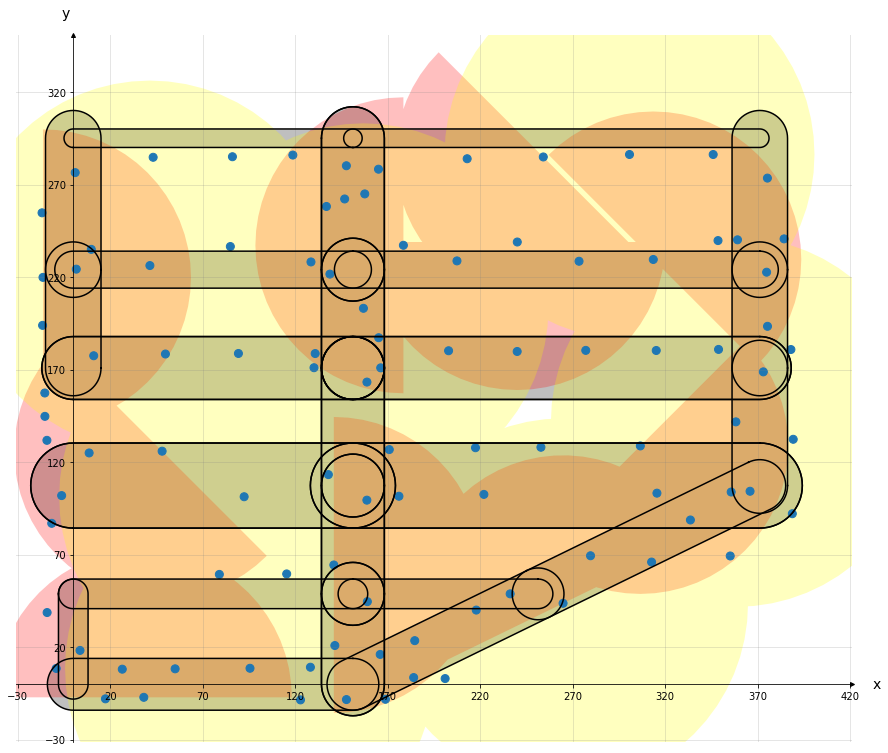

In [12]:
ss = [64 for i in lampx]

xmin, xmax, ymin, ymax = -30, 420, -30, 350

ticks_frequency = 50

fig, ax = plt.subplots(figsize = (15, 13))

gpd.GeoSeries(multiStreetsArea).plot(ax = ax, color = "grey", alpha = 0.5)

gpd.GeoSeries(multiLidarArea).plot(ax = ax, color = "red", alpha = 0.25)

gpd.GeoSeries(multiWifiArea).plot(ax = ax, color = "yellow", alpha = 0.25)

ax.scatter(lampx, lampy, s = ss)

for i in range(0, 33):
    x, y = widlines[i].exterior.xy
    ax.plot(x, y, c = "black")

ax.set(xlim = (xmin - 1, xmax + 1), ylim = (ymin - 1, ymax + 1), aspect = 'equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size = 14, labelpad = -24, x = 1.03)
ax.set_ylabel('y', size = 14, labelpad = -21, y = 1.02, rotation = 0)

x_ticks = np.arange(xmin, xmax + 1, ticks_frequency)
y_ticks = np.arange(ymin, ymax + 1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.grid(which = 'both', color = 'grey', linewidth = 1, linestyle = '-', alpha = 0.2)

arrow_fmt = dict(markersize = 4, color='black', clip_on = False)
ax.plot((1), (0), marker = '>', transform = ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker = '^', transform = ax.get_xaxis_transform(), **arrow_fmt)

plt.show()

In [13]:
def P(lidar, wifi, both):
    return (lidar - both) * 5000 + (wifi - both) * 3000 + both * 10000
p = P(lidarNum, wifiNum, bothNum)
p

73000

In [14]:
def coverageRate(back, front):
    return back.intersection(front).area / back.area

a1 = coverageRate(multiStreetsArea, multiLidarArea)
b1 = coverageRate(multiStreetsArea, multiWifiArea)
a2 = coverageRate(multiIntersectionArea.intersection(multiStreetsArea), multiLidarArea)
b2 = coverageRate(multiIntersectionArea.intersection(multiStreetsArea), multiWifiArea)

print(a1, b1, a2, b2)

0.736064239533346 0.973889513885088 0.7957887084096127 0.9707142824604575


In [15]:
k1 = 10000
k2 = 0.1
k3 = 100
b = wifiNum * 4

In [16]:
def S():
    return (k1 * (a1 + b1) * (a1 + b1) * (a1 + b1) + k2 * (a2 + b2) + k3 * b) / p

In [17]:
s = S()
print(s)

0.7232634228923434


In [18]:
def avgMinDist(xs, ys, ns):
    distlid = []
    for i in range(0, ns):
        for j in range(i + 1, ns):
            distlid.append(math.sqrt((xs[i] - xs[j]) * (xs[i] - xs[j]) + (ys[i] - ys[j]) * (ys[i] - ys[j])))
    distlid.sort()
    return sum(distlid[0 : ns]) / ns
aL = avgMinDist(xLidar, yLidar, lidarNum)
bL = avgMinDist(xWifi, yWifi, wifiNum)
print(aL, bL)

90.07376453197173 131.8738927099903


In [19]:
def cradNum(ns):
    Arect = 371.11 * 295.59
    return math.sqrt(Arect / ns / math.pi)

aC = cradNum(lidarNum)
bC = cradNum(wifiNum)
print(aC, bC)

59.09098929489167 70.62724095912691


In [20]:
aD = 0.5 * aL / aC
bD = 0.5 * bL / bC
print(aD, bD)

0.762161588482311 0.9335908561563928
